### <u>[Udemy] 시계열 데이터 분석 with 파이썬 - 87

### RNN Example for Time Series
**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
# IMPORTS HERE
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### DATA
Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA <br>
Read in the dataset "Miles_Traveled.csv" from the Data folder.
Figure out how to set the date to a datetime index columns

In [2]:
df = pd.read_csv('./Data/Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2022-07-01,287033.0
2022-08-01,289352.0
2022-09-01,280930.0


In [3]:
df.index.freq = 'MS'
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


### Task: Change the column names to Value

In [4]:
df.columns = ['Value']

### Task: Plot out the time series

<AxesSubplot: xlabel='DATE'>

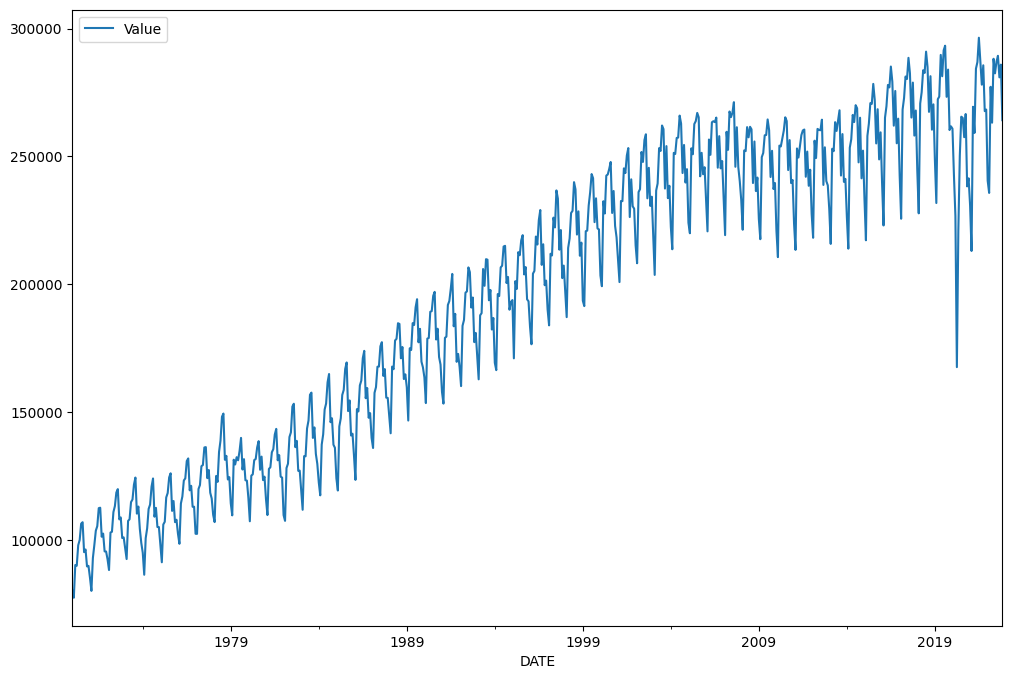

In [5]:
df.plot(figsize=(12,8))

### Task: Perform a Seasonal Decomposition on the model and plot out the ETS components

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

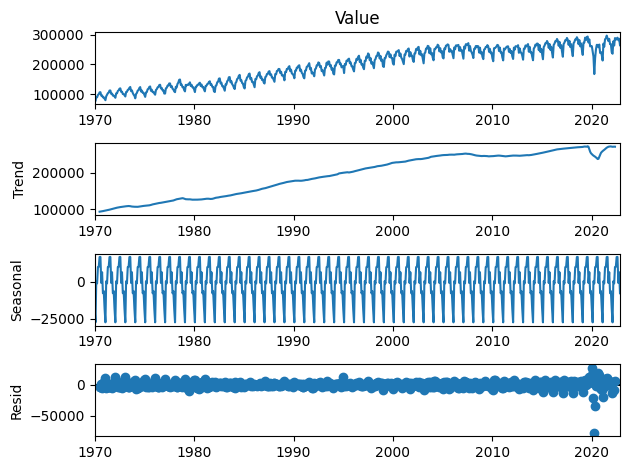

In [7]:
results = seasonal_decompose(df['Value'])
results.plot();

### Train Test Split
**TASK: Figure out the length of the data set**

In [8]:
len(df)

635

In [9]:
635 - 12

623

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [10]:
train = df.iloc[:623]
test = df.iloc[623:]

len(test)

12

### Scale Data
**TASK: Use a MinMaxScaler to sacle the train and test sets into scaled versions.**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator
**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be a least 12.**

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
n_input = 24
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1) # 시계열 데이터에는 배치 사이즈 작은 것이 좋음

### Create the Model
**TASK: Create Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Metal device set to: Apple M1


2023-01-31 15:37:54.383689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 15:37:54.383789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for!)**

In [20]:
model.fit_generator(generator, epochs=30)

Epoch 1/30


/var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/ipykernel_53836/132018848.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=30)
2023-01-31 15:37:54.540692: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 15:37:54.847164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


599/599 [==============================] - 268s 447ms/step - loss: 0.0111
Epoch 2/30
599/599 [==============================] - 270s 450ms/step - loss: 0.0072
Epoch 3/30
599/599 [==============================] - 269s 449ms/step - loss: 0.0061
Epoch 4/30
599/599 [==============================] - 269s 450ms/step - loss: 0.0061
Epoch 5/30
599/599 [==============================] - 270s 451ms/step - loss: 0.0049
Epoch 6/30
599/599 [==============================] - 271s 452ms/step - loss: 0.0040
Epoch 7/30
599/599 [==============================] - 267s 447ms/step - loss: 0.0030
Epoch 8/30
599/599 [==============================] - 272s 454ms/step - loss: 0.0023
Epoch 9/30
599/599 [==============================] - 263s 439ms/step - loss: 0.0022
Epoch 10/30
599/599 [==============================] - 263s 438ms/step - loss: 0.0022
Epoch 11/30
599/599 [==============================] - 263s 439ms/step - loss: 0.0020
Epoch 12/30
599/599 [==============================] - 263s 439ms/step - l

**TASK: Plot the hitory of the loss that occured during training**

In [51]:
# 여기 오류 왜나는지 이해 리얼 안감!!!!!!!!!!!!!!!!!!!!!!!!!!
loss_per_epoch = model.history.history['loss']

plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

KeyError: 'loss'

### Evaluate on Test Data
**TASK: Based on your test data and input size, create an appropriate; y size "first evaluation batch" like we did in the lecture.**

In [36]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.74894058],
       [0.7013535 ],
       [0.61919375],
       [0.87668731],
       [0.82994045],
       [0.94472756],
       [0.9564725 ],
       [1.        ],
       [0.95852284],
       [0.91618719],
       [0.95074159],
       [0.86886953]])

**TASK: Generate predictions into the same time stamps as the test set**

In [37]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 46ms/step


### Inverse Transformations and Compare
**TASK: Inverse Transform your new forecasted predictions.**

In [38]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[263344.50709963],
       [258013.0004611 ],
       [241756.06902552],
       [231433.52242613],
       [198481.66308832],
       [222139.92032146],
       [241777.47545671],
       [256624.53234386],
       [262615.43537951],
       [260226.94755507],
       [261214.72382784],
       [245453.76896095]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [39]:
test['Predictions'] = true_predictions # 메인 테스트 데이터프레임에 영향을 미쳐서 오류가 나오지만 영향 x

/var/folders/40/c3b3k6gx3fgb1p9w_gczw1lc0000gn/T/ipykernel_53836/4031223489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions # 메인 테스트 데이터프레임에 영향을 미쳐서 오류가 나오지만 영향 x


In [40]:
test

,Value,Predictions
DATE,,
2021-12-01,268333.0,263344.507100
2022-01-01,240520.0,258013.000461
2022-02-01,235737.0,241756.069026
2022-03-01,277239.0,231433.522426
2022-04-01,263204.0,198481.663088
2022-05-01,288197.0,222139.920321
2022-06-01,282503.0,241777.475457
2022-07-01,287033.0,256624.532344
2022-08-01,289352.0,262615.435380


**TASK: Plot out the test set against your own predicted values**

<AxesSubplot: xlabel='DATE'>

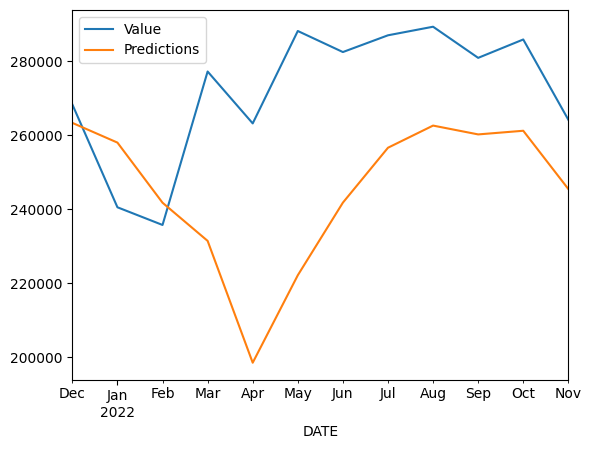

In [41]:
test.plot()

### Saving Models
**TASK: Optional, Save your model!**

In [42]:
model.save('./Model/Miles_Traveled_model.h5')